In [1]:
import json
import numpy as np
from tqdm import tqdm
from csc.utils import *
from csc.atoms import *
from csc.dictionary import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.60
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.01
ymax = 0.034
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 1428 different atoms


In [3]:
path_to_db = '/home/gomes/synthetic-data/signals_db1.json'
with open(path_to_db, 'r') as f:
    signals_db = json.load(f)
print('The database has {} omp processed signals'.format(len(signals_db)))

The database has 15 omp processed signals


In [4]:
path_to_omp_db = '/home/gomes/synthetic-data/omp_db1.json'
with open(path_to_omp_db, 'r') as f:
    omp_db = json.load(f)
print('The database has {} omp processed signals'.format(len(omp_db)))

The database has 15 omp processed signals


In [5]:
worst_omp_idx = np.argmax([signal['mse'] for signal in omp_db])
worst_omp_dict = omp_db[worst_omp_idx]
print('The worst omp signal has a mse of {}'.format(omp_db[worst_omp_idx]['mse']))
print(worst_omp_dict)

The worst omp signal has a mse of 0.008514160490994422
{'id': 0, 'mse': 0.008514160490994422, 'sparsity': 3, 'approx': [-1.5077102803551512e-18, 1.9189039931792847e-18, -1.4254715377903246e-17, 8.90919711118953e-18, -1.2884069668489469e-17, -4.66019541200683e-18, -1.2747005097548094e-17, 3.152485131651678e-18, -5.8937765504792256e-18, 4.523130841065452e-18, 2.7412914188275484e-19, -6.1679056923619804e-18, 1.1650488530017074e-17, 1.9189039931792823e-18, -1.0279842820603302e-17, 5.071389124830961e-18, -1.1650488530017074e-17, -9.594519965896408e-19, -1.0416907391544678e-17, -1.1924617671899828e-17, -6.0308411214206034e-18, -1.918903993179283e-17, -1.699600679673079e-17, -4.934324553889584e-18, -1.548829651637564e-17, -6.71616397612749e-18, -2.3986299914741035e-17, -2.247858963438589e-17, -1.2609940526606715e-17, -1.918903993179283e-18, -1.1513423959075697e-17, 1.6447748512965283e-18, -1.6721877654848038e-17, -1.75442650804963e-17, -4.660195412006831e-18, -4.249001699182699e-18, -1.302113

In [6]:
signal_dict = next((item for item in signals_db if item['id'] == worst_omp_dict['id']), None)
print(signal_dict)


{'id': 0, 'snr': -5, 'sparsity': 3, 'signal': [-0.054743468584777806, 0.01550343288941441, -0.008182270478341502, 0.03188319661479574, 0.03826456251448785, 0.006678284959950847, 0.12072292473615277, -0.013923504850887, -0.020510706690540878, 0.09339934784759145, 0.015944456039888612, 0.03483290471453804, -0.008178815502041283, 0.06934298115747725, 0.04907593294393008, 0.013989012852892021, -0.007416849717530419, -0.016875835654079466, 0.025758367115554567, 0.005139839651380427, -0.1567122953432787, 0.09965278037552713, 0.1600380151364184, 0.1326962239558005, -0.09060404470630867, -0.019612259729022908, -0.051563998383771126, 0.011411056046330949, -0.024288332248147245, 0.12453918539614847, 0.09382226414618998, 0.009328509042483562, 0.05383927852800963, -0.006488165187006215, -0.024281014442324434, -0.08529054689408058, 0.12282946361073838, -0.10244585325647848, -0.08639990866971078, -0.10694417376695613, -0.0034957165405108447, -0.06906338135511594, -0.09293693148075698, 0.000205439249

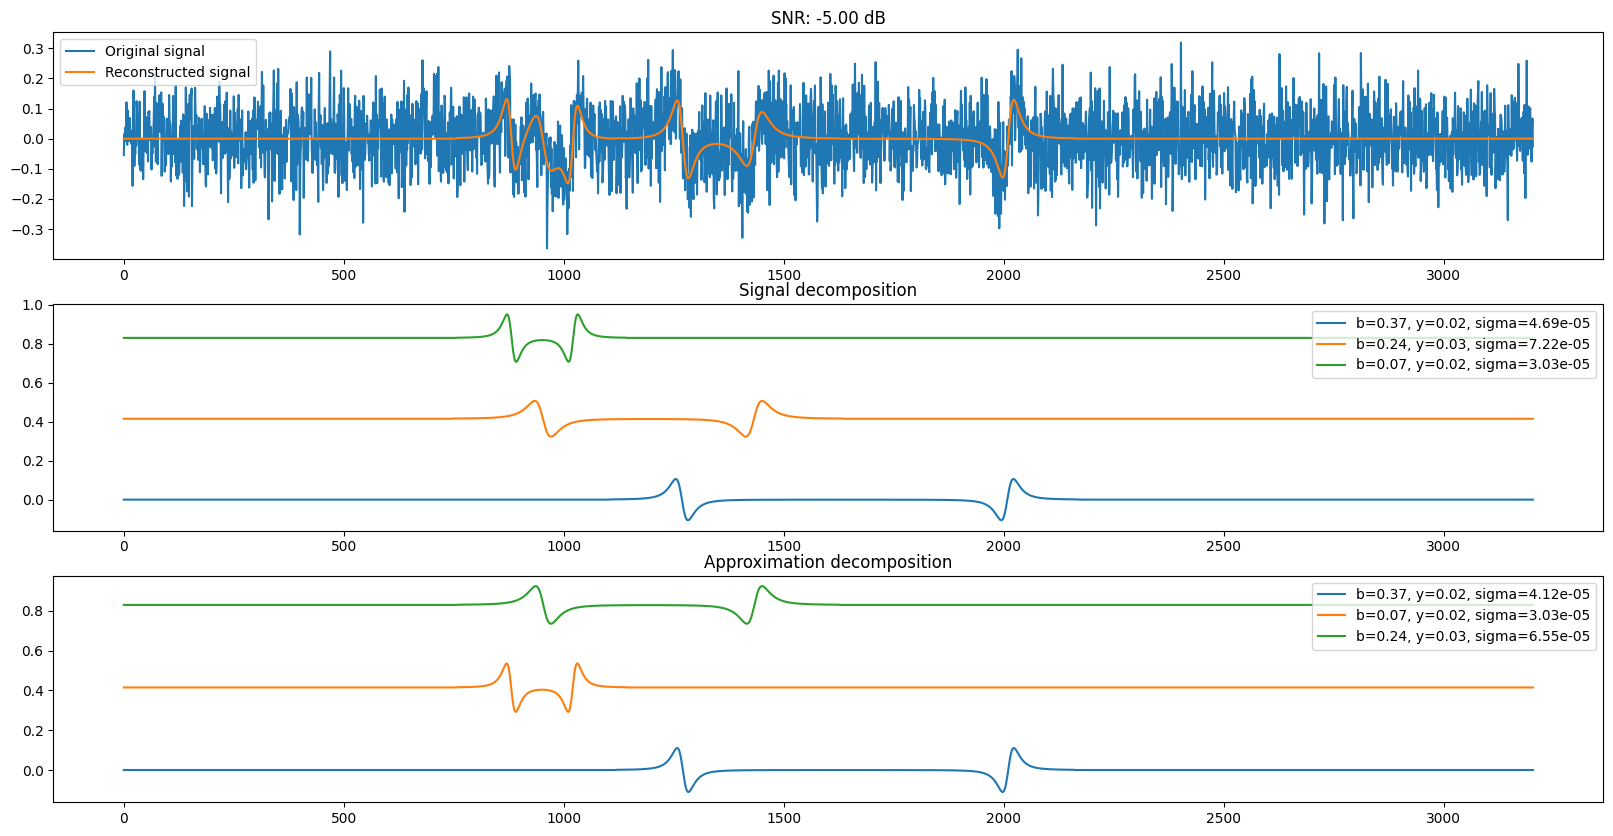

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10))

axs[0].plot(signal_dict['signal'], label='Original signal')
axs[0].plot(worst_omp_dict['approx'], label='Reconstructed signal')
axs[0].set_title('SNR: {:.2f} dB'.format(signal_dict['snr']))

signal_atoms = signal_dict['atoms']
approx_atoms = worst_omp_dict['atoms']

# Signal decomposition
offset = np.max(signal_dict['signal'])*1.3
for i, atom in enumerate(signal_atoms) :
    zs_atom = dictionary.getAtomFromParams(atom['b'], atom['y'], atom['s'])
    if zs_atom is not None :
        atom_in_signal = zs_atom.getAtomInSignal(len(signal_dict['signal']), atom['x'])
        axs[1].plot(atom_in_signal + offset*i, label=str(zs_atom))
axs[1].set_title('Signal decomposition')

# Approx decomposition
offset = np.max(signal_dict['signal'])*1.3
for i, atom in enumerate(approx_atoms) :
    zs_atom = dictionary.getAtomFromParams(atom['b'], atom['y'], atom['s'])
    if zs_atom is not None :
        atom_in_signal = zs_atom.getAtomInSignal(len(signal_dict['signal']), atom['x'])
        axs[2].plot(atom_in_signal + offset*i, label=str(zs_atom))
axs[2].set_title('Approximation decomposition')

axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.show()